In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import cv2

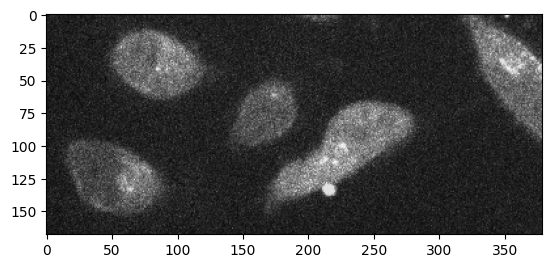

In [2]:
img = cv2.cvtColor(cv2.imread("a4_res.png"), cv2.COLOR_BGR2GRAY)
plt.imshow(img, 'gray')

In [3]:
shp = img.shape
shp

(168, 379)

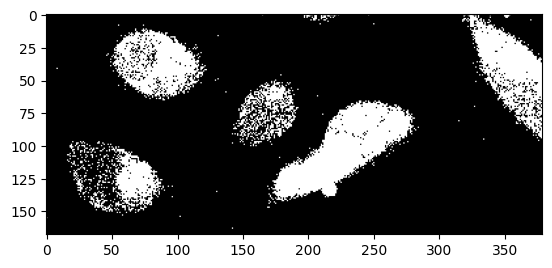

In [4]:
thresh = np.max(img)
for i in range(shp[0]):
  for j in range(shp[1]):
    if img[i][j] > 0.35*thresh :
      img[i][j] = 255
    else:
      img[i][j] = 0

plt.imshow(img, 'gray')

In [24]:
Xmask = []
for i in range(shp[0]):
  for j in range(shp[1]):
    if img[i][j] == 255:
      x = [j, i]
      Xmask.append(x)

Xmask = np.array(Xmask)

In [25]:
rot = [[-1, 0], [0, -1]]
Xmask_n = np.matmul(rot, Xmask.T)

In [26]:
flip = [[-1, 0], [0, 1]]
Xmask = np.matmul(flip, Xmask_n)

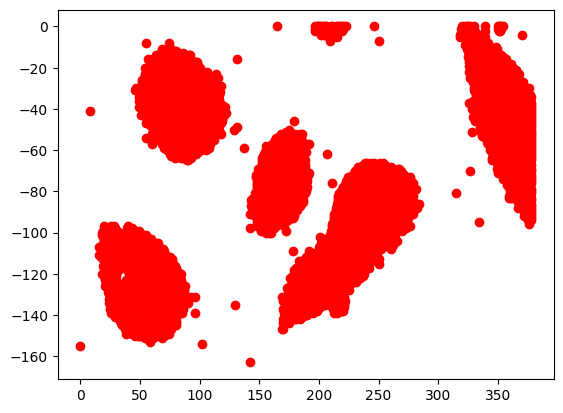

In [27]:
plt.scatter(Xmask[0], Xmask[1], c='r')

In [28]:
Xmask.T

array([[ 165,    0],
       [ 197,    0],
       [ 198,    0],
       ...,
       [ 102, -154],
       [   0, -155],
       [ 142, -163]])

In [29]:
Ymask = Xmask.T

In [30]:
shp2 = Ymask.shape
shp2

(10729, 2)

In [31]:
labels = []
for t in range(shp2[0]):
  i = Ymask[t][1]
  j = Ymask[t][0]
  if img[i][j] == 255 and i>-70 and i<-5 and j<145 and j>45:
    labels.append(1)
  elif img[i][j] == 255 and i>-160 and i<-90 and j>15 and j<100:
    labels.append(2)
  elif img[i][j] == 255 and i>-105 and i<-45 and j>135 and j<205:
    labels.append(3)
  elif img[i][j] == 255 and i>-155 and i<-65 and j>160 and j<295:
    labels.append(4)
  elif img[i][j] == 255 and i>-105 and i<1 and j>315:
    labels.append(5)
  else:
    labels.append(6)

labels = np.array(labels)

In [32]:
len(labels)

10729

In [33]:
d = DataFrame(Xmask.T)
d['labels'] = labels
d

,0,1,labels
0,165,0,6
1,197,0,6
2,198,0,6
3,199,0,6
4,200,0,6
...,...,...,...
10724,68,-151,2
10725,58,-153,6
10726,102,-154,6
10727,0,-155,6


In [67]:
d0 = d[d['labels']== 1]
d1 = d[d['labels']== 2]
d2 = d[d['labels']== 3]
d3 = d[d['labels']== 4]
d4 = d[d['labels']== 5]
d5 = d[d['labels']== 6]

In [68]:
d2

,0,1,labels
3128,179,-46,3
3660,184,-52,3
3661,186,-52,3
3744,185,-53,3
3828,183,-54,3
...,...,...,...
7194,164,-97,3
7195,171,-97,3
7262,160,-98,3
7389,158,-100,3


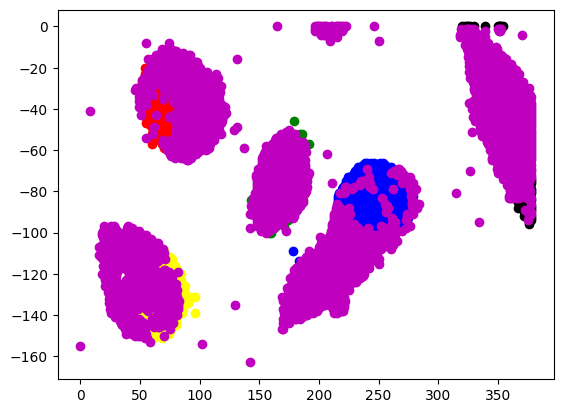

In [70]:
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.scatter(d3[0], d3[1], c ='b')
plt.scatter(d4[0], d4[1], c ='k')
plt.scatter(d5[0], d5[1], c ='m')
plt.show()

In [59]:
df = DataFrame(Ymask)
df

,0,1
0,165,0
1,197,0
2,198,0
3,199,0
4,200,0
...,...,...
10724,68,-151
10725,58,-153
10726,102,-154
10727,0,-155


In [38]:
gmm = GaussianMixture(n_components = 5)

gmm.fit(df)

GaussianMixture(n_components=5)

In [39]:
# Assign a label to each sample
lbls = gmm.predict(df)
df['labels']= lbls
d0 = df[df['labels']== 0]
d1 = df[df['labels']== 1]
d2 = df[df['labels']== 2]
d3 = df[df['labels']== 3]
d4 = df[df['labels']== 4]

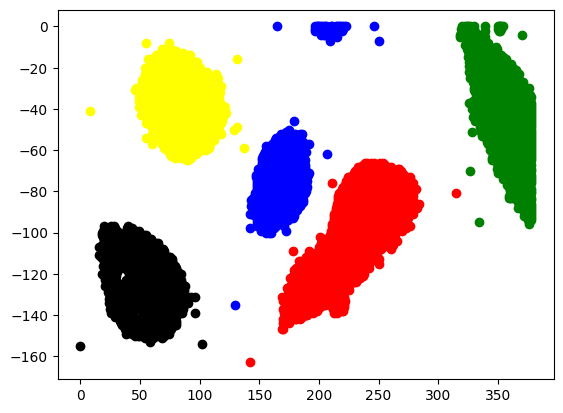

In [40]:
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.scatter(d3[0], d3[1], c ='b')
plt.scatter(d4[0], d4[1], c ='k')
plt.show()

In [41]:
import itertools
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])

        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

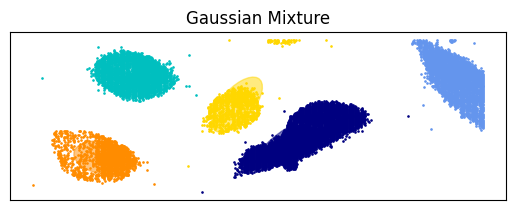

In [42]:
plot_results(Xmask.T, gmm.predict(Xmask.T), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

#Final Processing Pipeline#

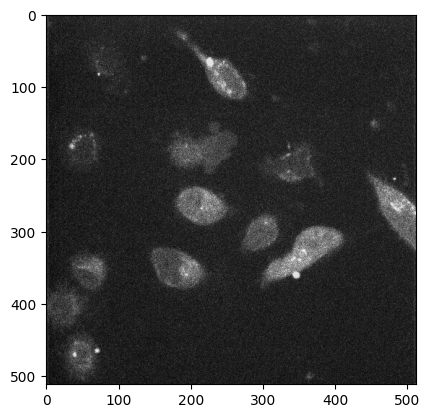

In [77]:
img = cv2.cvtColor(cv2.imread("a4.png"), cv2.COLOR_BGR2GRAY)
plt.imshow(img, 'gray')

In [78]:
shp = img.shape
shp

(512, 512)

In [79]:
def thresh_img(image, th):
  if th >=1 :
    print("Not valid value (0-1).")
    return None
  shp = image.shape
  thresh = np.max(image)
  for i in range(shp[0]):
    for j in range(shp[1]):
      if image[i][j] > th*thresh :
        image[i][j] = 255
      else:
        image[i][j] = 0

  return image

In [80]:
img = thresh_img(img, 0.35)

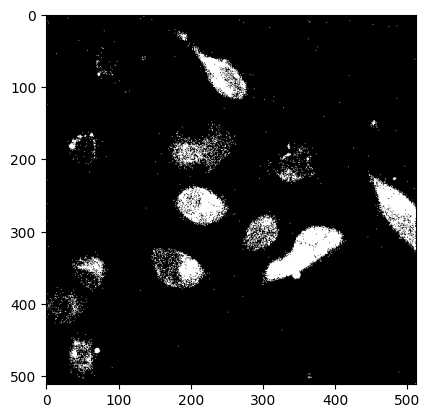

In [81]:
plt.imshow(img, 'gray')

In [82]:
def mask(img):
  shp = img.shape
  Xmask = []
  for i in range(shp[0]):
    for j in range(shp[1]):
      if img[i][j] == 255:
        x = [j, i]
        Xmask.append(x)

  return np.array(Xmask)

In [83]:
Xmask = mask(img)

In [84]:
def pos_align(Xmask):
  rot = [[-1, 0], [0, -1]]
  Xmask_n = np.matmul(rot, Xmask.T)
  flip = [[-1, 0], [0, 1]]
  Xmask = np.matmul(flip, Xmask_n)
  return Xmask

In [92]:
Ymask = Xmask.T
df = pd.DataFrame(Ymask)

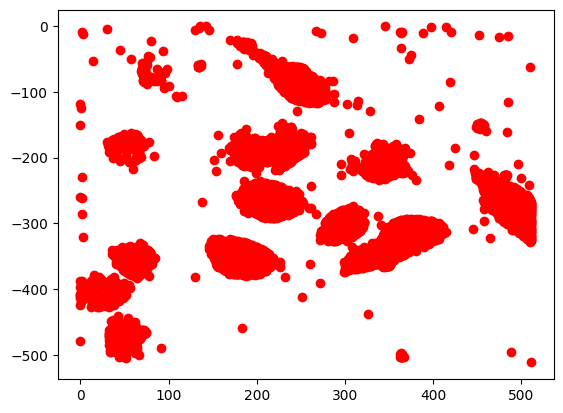

In [86]:
Xmask= pos_align(Xmask)
plt.scatter(Xmask[0], Xmask[1], c='r')

In [94]:
def get_model(comps):
  gmm = GaussianMixture(n_components = comps)
  return gmm

In [97]:
n_components = 10

In [98]:
gmm = get_model(n_components)
gmm.fit(df)

GaussianMixture(n_components=10)

In [99]:
lbls = gmm.predict(df)
df['labels']= lbls

In [101]:
unq = df["labels"].unique()

In [103]:
dlabels = []
for i in range(len(unq)):
  temp = df[df["labels"] == unq[i]]
  dlabels.append(temp)

In [105]:
cols = ['b', 'g', 'r', 'k', 'y', 'm', 'c', '0.75', '0.85', '0.5']

In [109]:
def plot(labels, cols):
  for i in range(len(labels)):
    plt.scatter(labels[i][0], labels[i][1], c = cols[i])
  plt.show()

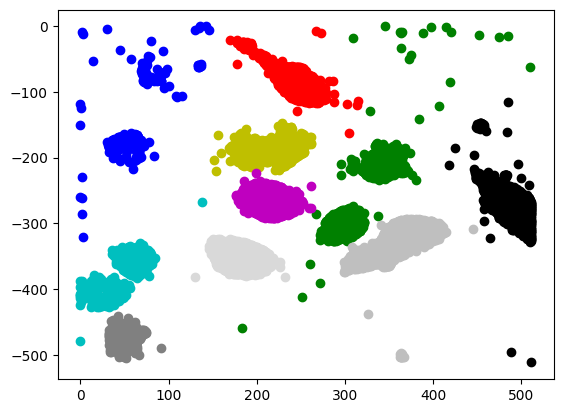

In [111]:
plot(dlabels, cols)